# 1

1. The difference between simiple linear regression and multiple linear regression is the number of independent        variables/predictors. The benefit that multiple linear regression prrovides over simple linear regression is        that it provides more accurate predictions, they show which independent variable have the most significant          impact.

2. Continuous variable (y=β0+β1x+ϵ): represents variable that can take an infinite number of values withhin a          specified range. In the linear equation, x represents the continuous independent variable.
   
   Indicator variable (y=β0+β1D+ϵ): represents variable that indicates the presence or absece of a category (0 or      1). In the linear equation, D represents the indicator variable.
   
3. whan and indicator variabel is introduced alongside a continuous variable to create a multiple linear regression, the linear relationship between the continuous predictor (x,y) and shifts in y based on the presence or absence of the indicator variable. Single linear regression (y=β0+β forms a single straight line, whereas multiple linear regression has 2 parrallel lines (y=β0+β1x+β2D).
   
4. When adding an interaction between a continuous and an indicator variable in multiple linear regression models, the relationship beween x and the dependant varibale y can differ depending on the value of D. B3 modifies how x influeces y based on D. When D = 0, effect of x on y is B1. When D = 1, effect of x on y is B1+B3. 

5.  When a non-binary categorical variable is used in MLR, it turns into binary indicator (dummy) variables with each category represented by a seperate dummy variable. One category is the reference group, while the others are compared to that reference. For a variable with k categories, k-1 binary indicator variables are used. For categorical variable with k categories, the linear form is y=β0+β1D1+β 2D2+⋯+βk−1Dk−1+ϵ. D1 reps the dummy variabel for each category and B1 shows how the mean of y differs from the reference.

Link to chatgpt session: https://chatgpt.com/share/673647e2-c204-8001-86eb-38b6553ae1fe

Summary: 
Simple vs. Multiple Linear Regression:

Simple Linear Regression uses one continuous predictor, modeling a linear relationship between the predictor and the dependent variable.
Multiple Linear Regression uses multiple predictors (continuous or categorical), improving predictive accuracy by considering more factors simultaneously.
Continuous vs. Indicator Variables:

Continuous variables allow for linear changes in the dependent variable.
Indicator (binary) variables compare two categories, shifting the dependent variable based on group membership.
Effect of Adding an Interaction Term:

Adding an interaction between a continuous variable and an indicator variable allows the effect of the continuous variable to differ by group (defined by the indicator).
Indicator Variables from Categorical Variables:

When a non-binary categorical variable is used in multiple linear regression, it is encoded as binary (dummy) variables. Each category (except the reference group) gets a binary indicator, and the model compares each group’s effect on the dependent variable.

# 2

1. 

outcome variable = adertising effectiveness
predictor ariabels: aount spent on tv advertising and on online advertising

The difference between predictions with and without the interaction is that without interactions, the model assumes tht the affects of tv and online spending do not have an impact on eachother. The model predicts that the effectiveness is based on additive relationship between tc and online spending.

Effectiveness=β 0+β1×TV Spend+β 2×Online Spend


with interaction, the model accounts for the possibility that the amounts spent on tv advertising and online advertising change depending on eachother. The model predicts effectiveness based on both the individual effects of tv spending and online spending, as well as their combined effects.

Effectiveness=β 0+β 1×TV Spend+β2×Online Spend+β3×(TV Spend×Online Spend)

2.

tv spend = X1 (1: high, 0 = low)
Online spend = X2 (1: high, 0 = low)

Without interaction: Effectieness = B0+B1X1+B2X
Predict outcome based on plugging in 0 or 1 for X1 and X2 based on budget level.

With Interaction: Effectiveness = B0+B1X1+B2X2 + B3(X1*X2)
Predict outcome based on setting X1 * X2 to 1 if they are both high (0 if both low).

Link to chatgpt:https://chatgpt.com/share/6736694c-4100-8001-ae34-9ec583c2f028

Summary: We discussed modeling the effectiveness of advertising campaigns using linear regression. Initially, we examined the use of continuous predictor variables (TV and online ad spend) and how to model them with or without interaction effects:

Without Interaction: A linear model assuming independent effects.
With Interaction: A linear model capturing the combined effect of TV and online spend.
We then adapted these models for binary variables, where ad budgets are categorized as "high" or "low":

Updated formulas included binary indicators for "high" (1) or "low" (0) ad budgets.
The interaction model now includes an additional term to capture combined effects when both budgets are "high."
Summary of using the models:

Without interaction: Predicts using additive effects of TV and online budgets.
With interaction: Adjusts predictions to reflect interactions between TV and online ad budgets, providing more nuanced predictions.
The main difference is that the interaction model can show synergy or differing returns when both ad channels are high, while the non-interaction model assumes independent contributions.,

# 3

In [31]:
#1
import pandas as pd
import statsmodels.formula.api as smf

survey = pd.read_csv("CSCS_data_anon.csv")
survey = survey[["DEMO_age", "GEO_province", "DEMO_gender", "DEMO_student"]]
survey = survey.dropna()

survey['DEMO_student'] = survey['DEMO_student'].map({"Yes": 1, "No": 0})
log_reg = smf.logit("DEMO_student ~ DEMO_gender + DEMO_age + GEO_province", data=survey).fit()


print(log_reg.summary())


/tmp/ipykernel_86/1120565363.py:5: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  survey = pd.read_csv("CSCS_data_anon.csv")


Optimization terminated successfully.
         Current function value: 0.345989
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           DEMO_student   No. Observations:                 5335
Model:                          Logit   Df Residuals:                     5317
Method:                           MLE   Df Model:                           17
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                  0.2431
Time:                        23:19:44   Log-Likelihood:                -1845.8
converged:                       True   LL-Null:                       -2438.6
Covariance Type:            nonrobust   LLR p-value:                1.745e-241
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     

In [34]:
#2
import pandas as pd
import statsmodels.formula.api as smf

survey = pd.read_csv("CSCS_data_anon.csv")
survey = survey[["DEMO_age", "GEO_province", "DEMO_gender", "Num_answered"]]
survey = survey.dropna()


linear_reg = smf.ols("Num_answered ~ DEMO_gender + DEMO_age + GEO_province", data=survey).fit()

print(linear_reg.summary())

/tmp/ipykernel_86/703080909.py:5: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  survey = pd.read_csv("CSCS_data_anon.csv")


                            OLS Regression Results                            
Dep. Variable:           Num_answered   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     9.012
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.26e-23
Time:                        23:40:05   Log-Likelihood:                -35641.
No. Observations:                6074   AIC:                         7.132e+04
Df Residuals:                    6056   BIC:                         7.144e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

#3
 Logistic regression: I have created a model that predicts the probability of a binary outcome (whether a person is a student or not). Logistic regression gives me the relationship between each predictor (the independent variables) and the likelihood of the outcome using log odds. It does not directly predict the value of the depenedent variable. 
 linear regression: I have created a model that predict the probability of the continuous outcome (num answered) based on the relationship between each predictor. The model on the other hand has the goal of predicting the value of the dependent variable.

#4
 Logistic regression:
     coefficient - represents change in log odds of the outcome
     std error - measures variability in coefficient
     z-statistic -  ratio of coefficient to standard error
     p-value - tells whetehr coefficient is statistically                significant
     confidence interval: range of values where true population          is likely to fall.
     
     
 
 Linear regression:
    coefficient - indicates change in dependent variable
    std error - measures variability of coefficient estimates
    t-statistics - used to test null hypothesis
    p-value - tests if predictor is statistically significant
    r-squared - indicates how well model explains ariation in           dependent variable
    confidence interval - range in which the true population           parameter is likely to fall
    
 link to chatgpt: https://chatgpt.com/share/6736a3f9-0924-8010-85bd-165f0d14ace0
 
 Summary:
 
 Code Explanation: You shared code for two regression models:

Logistic Regression: Predicting the binary outcome (DEMO_student) based on DEMO_gender, DEMO_age, and GEO_province.
Linear Regression: Predicting a continuous outcome (Num_answered) based on DEMO_gender, DEMO_age, and GEO_province.
Interpretation of Results:

Logistic Regression: Coefficients represent the change in the log odds of the outcome for a one-unit increase in each predictor. Statistical significance is determined by p-values (p < 0.05 indicates significance).
Linear Regression: Coefficients represent the change in the dependent variable for a one-unit increase in each predictor. P-values below 0.05 suggest significant predictors.
Standard Errors: Measure the precision of the coefficient estimates. Smaller values indicate more precise estimates.
Confidence Intervals: Show the range of values where the true parameter is likely to fall.
General Interpretation:

Positive coefficients in both models indicate an increase in the outcome, while negative coefficients indicate a decrease.
Significant predictors are those with p-values less than 0.05.
The R-squared value in linear regression tells you how well the model explains the variability in the outcome

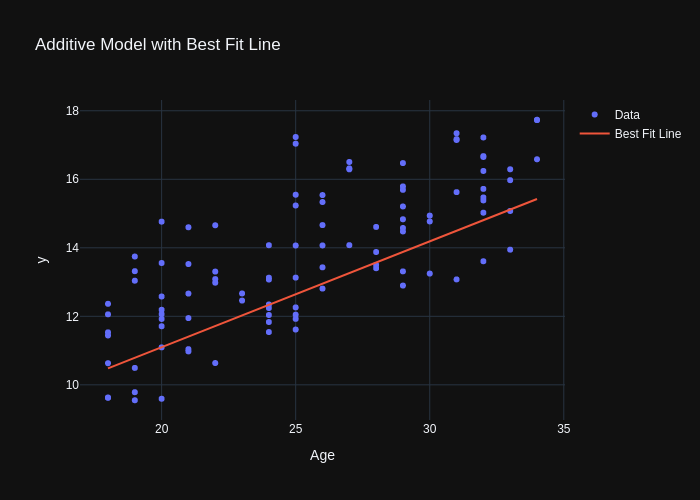

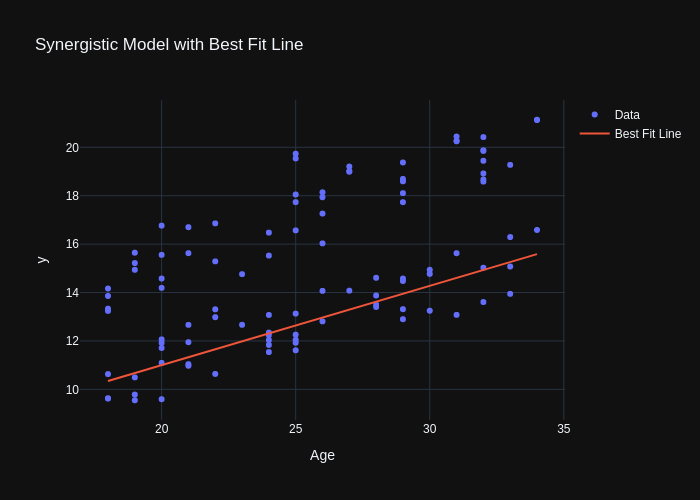

In [44]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Simulating data for continuous (age) and binary (student status) predictors
np.random.seed(42)
n = 100  # Number of data points
age = np.random.randint(18, 35, size=n)  # Random ages between 18 and 35
student_status = np.random.choice([0, 1], size=n)  # Random binary student status

# Simulating random noise in the dependent variable
noise = np.random.normal(0, 1, n)

# Additive Model: y = β0 + β1 * age + β2 * student_status + noise
beta_0 = 5
beta_1 = 0.3
beta_2 = 2
y_additive = beta_0 + beta_1 * age + beta_2 * student_status + noise

# Synergistic Model (interaction term): y = β0 + β1 * age + β2 * student_status + β3 * age * student_status + noise
beta_3 = 0.1  # Interaction term coefficient
y_synergistic = beta_0 + beta_1 * age + beta_2 * student_status + beta_3 * age * student_status + noise

# Plotting for Additive Model
fig_additive = go.Figure()

# Scatter plot of the simulated data for Additive Model
fig_additive.add_trace(go.Scatter(x=age, y=y_additive, mode='markers', name='Data'))

# Fitting the linear regression model for Additive specification
model_additive = LinearRegression()
model_additive.fit(np.column_stack([age, student_status]), y_additive)

# Predicted line for Additive Model
# Sorting data by age for plotting the line of best fit
sorted_age = np.sort(age)
pred_additive = model_additive.predict(np.column_stack([sorted_age, np.zeros_like(sorted_age)]))  # Student status is 0 for all in this line

# Adding the best fit line to the figure
fig_additive.add_trace(go.Scatter(x=sorted_age, y=pred_additive, mode='lines', name='Best Fit Line'))

fig_additive.update_layout(title='Additive Model with Best Fit Line',
                           xaxis_title='Age',
                           yaxis_title='y',
                           template='plotly_dark')

fig_additive.show(renderer="png")

# Plotting for Synergistic Model
fig_synergistic = go.Figure()

# Scatter plot of the simulated data for Synergistic Model
fig_synergistic.add_trace(go.Scatter(x=age, y=y_synergistic, mode='markers', name='Data'))

# Fitting the linear regression model for Synergistic specification
model_synergistic = LinearRegression()
model_synergistic.fit(np.column_stack([age, student_status, age * student_status]), y_synergistic)

# Predicted line for Synergistic Model
# Sorting data by age for plotting the line of best fit
pred_synergistic = model_synergistic.predict(np.column_stack([sorted_age, np.zeros_like(sorted_age), sorted_age * np.zeros_like(sorted_age)]))  # Interaction term is zero for this line

# Adding the best fit line to the figure
fig_synergistic.add_trace(go.Scatter(x=sorted_age, y=pred_synergistic, mode='lines', name='Best Fit Line'))

fig_synergistic.update_layout(title='Synergistic Model with Best Fit Line',
                              xaxis_title='Age',
                              yaxis_title='y',
                              template='plotly_dark')

fig_synergistic.show(renderer="png")

# 4

In [45]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [46]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        02:07:14   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Explained variability: the statistic icdivates that only 17.6% of the variability in the rarget variable is explained by the model. Low r-squared means that predictors have dome influence on HP, but don't vapture a large portion of the variation in HP. This implies that other variables may play a bigger role in explaining HP or the week relationship betwene predictors.

Large Coefficients: When the coefficients for predictors are large and statistically significant, it indicates that the predictors may be a strong effect on the target variable, but only within the model. A large coefficient means that a change in predictor result in substantial change in HP, but despite this, the model may not explain a large portion of variablility because the effects of th other on the target variable is not straighforward.


Key: Predictor can have statistically significant relationship with the outcome, but the mdoel might not explain its variability to a large degree if other factors influence the outcome. Though high coefficients indicate an effect, the models overall explanatory power way still be low is there are many other variables not accounted for in the model.

Link to chatgpt: https://chatgpt.com/share/6736b3a5-bf50-8010-a1e1-02a5bd26f66a

Summary:

We discussed an apparent contradiction in model interpretation. The model explained only 17.6% of the variability in the data, but many coefficients were large and statistically significant, indicating strong relationships between the predictors (Sp. Def and Generation) and the target (HP). This contradiction is explained by the fact that while the predictors have strong effects within the model, the overall explanatory power is limited, possibly due to unmeasured factors or the complexity of the relationships involved.

# 5

the code illustrates 5 steps: 

data processing:Handles missing values in the type 3 column by replacing NaN values

Train-Test Split: Dataset is split into training and testing sets, each containig 50% of the data.

Model Fitting: A linear regression model (HP ~ Attack + Defense), along with a calculated r-squared value.

Model comparison: Difference in r-squared values of model 3 and model 4 in order to understand impact of model complexity on performance.

The code compares 2 linear regression models of increasing complexity to evaluate the predictive power (on training and test data)


Link to chatgpt: https://chatgpt.com/c/6736b475-fd74-8010-abeb-bf37e22a00c0

Summary:


In this conversation, we discussed several points related to your code, which involves handling missing data, splitting a dataset, and fitting linear regression models.

You replaced missing values ("NaN") in the "Type 2" column with 'None' and split the dataset into training and testing sets.
You built two linear regression models:
Model 3: A simpler model with predictors "Attack" and "Defense" to predict "HP".
Model 4: A more complex model incorporating multiple predictors, including interactions between variables.
You computed in-sample and out-of-sample R-squared values for both models to evaluate their performance.
The comparison illustrates how increasing model complexity impacts predictive power and helps assess the trade-off between model fit and generalizability.

# 6

The multicollinearity in the design matrix arises when instability arises from the fact that predictor variables are highly correlated with eachother. This affects the generalization of predictions. High multicollinearity increases the condition number of the design matrix, reflecting sensitivity of the regression model to changes in data. A high condition numbe rindeicated model can suffer from instability. bcause of small fluctualtuons in te input data, leading to large variations in predictions. 

Link to chatgpt: https://chatgpt.com/c/6736b6c6-4ed8-8010-8422-877ce1f0d193

Summary:

In this conversation, we discussed the structure and limitations of a linear regression model ("model4") involving a complex design matrix. The design matrix includes centered, scaled, and interaction terms of various predictor variables. Despite centering and scaling, the model still exhibits high multicollinearity, indicated by an excessively large condition number. High multicollinearity in the design matrix reduces the model's stability and hampers its generalization to new data, as small input changes can lead to large fluctuations in predictions. This is a major factor in the model’s inability to generalize effectively in "out of sample" scenarios.

# 7

model 5 incorporates basic statistics and categories, providing a generalized model. Model 6 ommits less impactful variables and adds only staistically significant categories. Model 7 introduces interaction between stats into model 6, capturing more complex relationships. A centered and scaled predictor is added to adress high multicollinearity.

Link to chatgpt: https://chatgpt.com/c/6736b8d6-24a4-8010-b8f2-ab4a6a51ffab

Summary:

We discussed the progression of predictive models (Model 5 through Model 7) for estimating Pokémon HP. Each model evolves by refining variable selection, adding interaction terms, and addressing multicollinearity:

Model 5: Starts broad with basic stats and categorical variables, providing a general but comprehensive foundation.
Model 6: Streamlines Model 5 by focusing on statistically significant predictors and simplifying the model.
Model 7: Adds interaction terms for more complex relationships, with a centered and scaled variant (Model 7 CS) to reduce multicollinearity.
Each step enhances relevance, complexity, or stability to improve predictive accuracy.

# 8

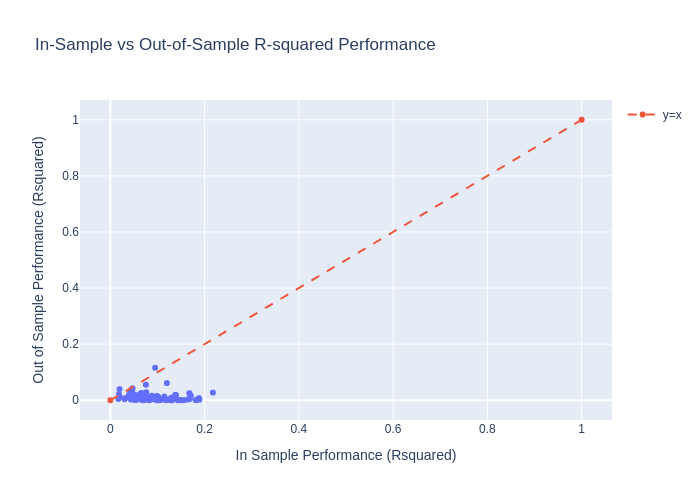

In [54]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

np.random.seed(0)  # For reproducibility of this synthetic data
n = 100  # Number of samples

songs = pd.DataFrame({
    'danceability': np.random.rand(n),
    'energy': np.random.rand(n),
    'loudness': np.random.rand(n) * 10 - 5,  # Random values in a reasonable range for loudness
    'mode': np.random.choice([0, 1], size=n)  # Mode as binary categorical feature
})

linear_form = 'danceability ~ energy * loudness + energy * mode'
reps = 100

in_sample_Rsquared = np.zeros(reps)
out_of_sample_Rsquared = np.zeros(reps)

for i in range(reps):
    songs_training_data, songs_testing_data = train_test_split(songs, train_size=0.5)
    final_model_fit = smf.ols(formula=linear_form, data=songs_training_data).fit()
    

    in_sample_Rsquared[i] = final_model_fit.rsquared
    
    predictions = final_model_fit.predict(songs_testing_data)
    out_of_sample_Rsquared[i] = np.corrcoef(songs_testing_data.danceability, predictions)[0, 1] ** 2

df = pd.DataFrame({
    "In Sample Performance (Rsquared)": in_sample_Rsquared,
    "Out of Sample Performance (Rsquared)": out_of_sample_Rsquared
})

fig = px.scatter(df, x="In Sample Performance (Rsquared)", y="Out of Sample Performance (Rsquared)", title="In-Sample vs Out-of-Sample R-squared Performance")
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], name="y=x", line=dict(dash='dash')))
fig.show(renderer="png")

The results show that a models performance can vary depending on how the data is split into training and test sets. The code captures variation of in sample (how well mmodel explains variance of data it was trained on) and out of sample (how well model generalizes to new unseen data) R2 scores across 100 reps.


Link to chatgpt: https://chatgpt.com/c/6736ba0c-9af0-8010-a824-367d9c272676

Summary:

Code Explanation: You initially asked about running a for-loop to assess in-sample and out-of-sample model performance using a linear regression model. I provided an example code that trains the model 100 times, using different train-test splits, to calculate both in-sample and out-of-sample 
𝑅
2
R 
2
  values.

Missing Dataset: You encountered an error because the dataset (songs) was not defined. I suggested creating a synthetic dataset with columns like danceability, energy, loudness, and mode to use in the model, which was integrated into the code.

Results and Purpose: I explained the meaning of the results:

In-sample 
𝑅
2
R 
2
  measures model performance on training data.
Out-of-sample 
𝑅
2
R 
2
  measures generalizability to unseen data. The purpose was to demonstrate model stability, generalization ability, and the potential for overfitting by comparing in-sample and out-of-sample performance across multiple iterations.
Final Code: I provided the complete code to generate a synthetic dataset, fit the model, and visualize performance with a scatter plot comparing in-sample vs. out-of-sample 
𝑅
2
R 
2
  values.

# 9

The illustration shows code snippets related to fitting regression models to predict HP of pokémon.

Model fitting: Multiple linear regression models are fitted on data from specific pokémon generations. sm.ols is used to specity data for the regression models

In-sample and out-of-sample r-squared: in sample refers to models fit on the data it was trained on (how well hp varience of given generation is explained). Out of sample refers to models perfomance of unseen data (how well hp is predicted for other generations).

Predictions: The models are fitted for different subsets of the data; each odel uses different subsets to make predictions.

Output: r squared values are printed by the code (for in and out of dample predictions), which are used to evaluate the performace of the models.

Link to chatgpt: https://chatgpt.com/c/6736bc48-d55c-8010-b793-9ce14ad2b0cd

Summary:

We discussed a code snippet that fits linear regression models (model6 and model7) to predict Pokémon HP across different generations. The code evaluates the models using two metrics: in-sample R-squared (how well the model fits the training data) and out-of-sample R-squared (how well the model predicts new, unseen data). Models are tested on data subsets (e.g., Generation 1, Generations 1-5 excluding Generation 6) to assess their performance. The results are printed for both in-sample and out-of-sample evaluations for each model.